In [1]:
import pandas as pd
import pylab as pl
import urllib.request
from urllib.request import urlretrieve
import zipfile
import geopandas as gp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exploring Business licenses 

In [2]:
licenses = pd.read_csv("License_Applications.csv")

In [3]:
licenses.shape

(224163, 25)

In [4]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status  Start Date    End Date  \
0            PEYKO TZENOV  Issued  01/09/2017  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued  12/28/2016  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued  12/31/2016  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued  01/09/2017  01/10/2017   
4            LEUNG, WAI M  Issued  12/26/2017  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration       ...       Unit Type  \
0                   NaN                       NaN       ...             NaN   
1                   NaN                       NaN       ...             NaN   
2                   NaN                       NaN       ...             NaN   
3                   NaN                       NaN       ...             NaN   
4                   NaN                       NaN       ...             NaN   

  Unit Description       City State    Zip Contact Phone  Longitude  \
0  NaN         NaN      BRONX    NY  10467    9178047161 -73.877091   
1  NaN         NaN   BROOKLYN    NY  11201    8009279801 -73.987746   
2  NaN         NaN   BROOKLYN    NY  11222  347-987-3235 -73.954098   
3  NaN         NaN  GLEN OAKS    NY  11004    7189748124        NaN   
4  NaN         NaN   BROOKLYN    NY  11223    6464672890 -73.960942   

    Latitude Active Vehicles  
0  40.876214             NaN  
1  40.691630             NaN  
2  40.729869             NaN  
3        NaN             NaN  
4  40.594763             NaN  

[5 rows x 25 columns]

In [5]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [6]:
zip_ref = zipfile.ZipFile("ZIP_CODE.zip", 'r')
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("census_tracts.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
zipcodes = gp.GeoDataFrame.from_file("ZIP_CODE_040114.shp")
ct = gp.GeoDataFrame.from_file("geo_export_04e27bfe-654f-460f-beae-1bb88eaacb66.shp")

In [8]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/fedhere/choroplethNYC/master/choroplethNYC.py","choroplethNYC.py")

import choroplethNYC as cp

In [9]:
zipcodes.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.251871482 188138.3800067157,...  
1  POLYGON ((1001613.712964058 186926.4395172149,...  
2  POLYGON ((1011174.275535807 183696.33770971, 1...  
3  POLYGON ((995908.3654508889 183617.6128015518,...  
4  POLYGON ((991997.1134308875 176307.4958601296,...

## Quick visualization of where the Businesses licenses aplications are located 

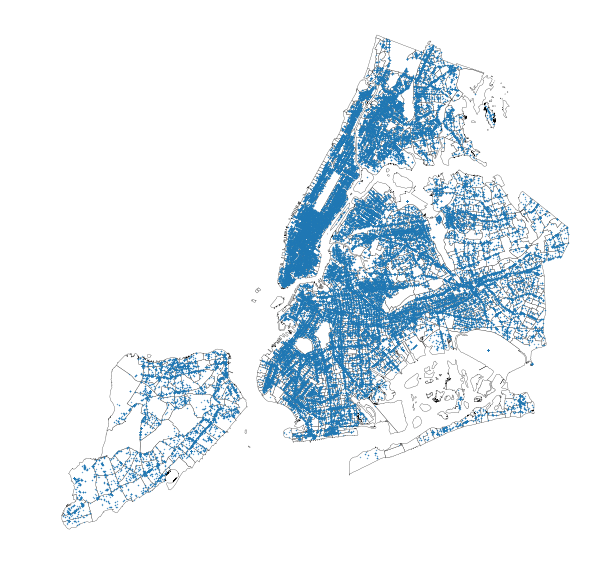

In [10]:

cp.choroplethNYC(ct, column=None, color="white", edgecolor="black", lw=0.25);

pl.scatter(licenses.Longitude, licenses.Latitude, s=0.1)


# We groupby zip code so we have the count of the busniness licenses by zip  

In [11]:
countzip = licenses.groupby(licenses["Zip"]).count()

In [12]:
countzip.head()

Application ID  License Number  License Type  Application or Renewal  \
Zip                                                                           
00                  1               1             1                       1   
000                11              11            11                      11   
00000              10               8            10                      10   
00623               1               1             1                       1   
00637               2               2             2                       2   

       Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
Zip                                                                         
00                 1       1           1         1                      0   
000               11      11          11        11                      0   
00000             10      10          10         9                      0   
00623              1       1           1         1                      0   
00637              2       2           2         2                      0   

       Temp Op Letter Expiration       ...         Street 2  Unit Type  Unit  \
Zip                                    ...                                     
00                             0       ...                0          0     0   
000                            0       ...                0          0     0   
00000                          0       ...                0          0     2   
00623                          0       ...                0          0     0   
00637                          0       ...                0          0     0   

       Description  City  State  Contact Phone  Longitude  Latitude  \
Zip                                                                   
00               1     1      1              1          0         0   
000              6    11     11             11          4         4   
00000            2    10     10              8          3         3   
00623            0     1      1              1          0         0   
00637            0     2      2              2          0         0   

       Active Vehicles  
Zip                     
00                   0  
000                  0  
00000                0  
00623                0  
00637                0  

[5 rows x 24 columns]

In [13]:
countzip["Zip"] = countzip.index
countzip["Zips"] = countzip.Zip

In [14]:
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

# Transform into geodataframe

In [15]:
zips_ = gp.GeoDataFrame(zips)

In [16]:
licenses.head(1)

Application ID License Number License Type Application or Renewal  \
0  1066-2017-RHIC    1294131-DCA     Business                Renewal   

  Business Name  Status  Start Date    End Date Temp Op Letter Issued  \
0  PEYKO TZENOV  Issued  01/09/2017  01/10/2017                   NaN   

  Temp Op Letter Expiration       ...       Unit Type Unit Description   City  \
0                       NaN       ...             NaN  NaN         NaN  BRONX   

  State    Zip Contact Phone  Longitude   Latitude Active Vehicles  
0    NY  10467    9178047161 -73.877091  40.876214             NaN  

[1 rows x 25 columns]

In [17]:
zips.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1905            1813          1905                    1905   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1905    1905        1905      1852                     12   

   Temp Op Letter Expiration  \
0                         13   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

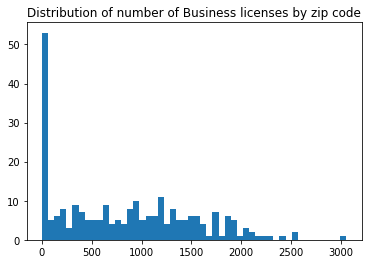

In [18]:
pl.hist(zips["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [19]:
zips1 = zips[zips["License Type"]>0]

Text(0.5,1,'Distribution of number of Business licenses by zip code')

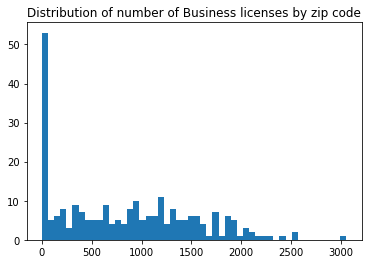

In [20]:
pl.hist(zips1["License Type"], bins=50);
pl.title("Distribution of number of Business licenses by zip code")

In [21]:
type(zips.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [22]:
type(zips_.geometry.iloc[1])

shapely.geometry.polygon.Polygon

In [23]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1905            1813          1905                    1905   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1905    1905        1905      1852                     12   

   Temp Op Letter Expiration  \
0                         13   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

# Number of total licenses by zip code

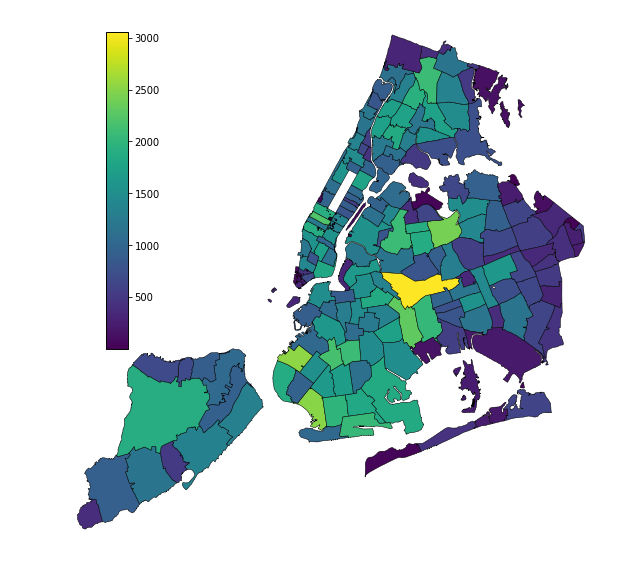

In [24]:


cp.choroplethNYC(zips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);



# Here the general overview is over, we need to start looking for specific types of licenses to see if we get something better.

In [25]:
licenses.head()

Application ID License Number License Type Application or Renewal  \
0   1066-2017-RHIC    1294131-DCA     Business                Renewal   
1  33312-2016-RELE    2010590-DCA     Business                Renewal   
2  33701-2016-RELE    2025971-DCA     Business                Renewal   
3   1223-2017-RHIS    1217547-DCA   Individual                Renewal   
4  20143-2017-ALAU    2064612-DCA     Business            Application   

            Business Name  Status  Start Date    End Date  \
0            PEYKO TZENOV  Issued  01/09/2017  01/10/2017   
1  T-MOBILE NORTHEAST LLC  Issued  12/28/2016  01/07/2017   
2   LUCAS ELECTRONICS INC  Issued  12/31/2016  01/10/2017   
3     JUSTINIANO SALDIVAR  Issued  01/09/2017  01/10/2017   
4            LEUNG, WAI M  Issued  12/26/2017  01/09/2018   

  Temp Op Letter Issued Temp Op Letter Expiration       ...       Unit Type  \
0                   NaN                       NaN       ...             NaN   
1                   NaN                       NaN       ...             NaN   
2                   NaN                       NaN       ...             NaN   
3                   NaN                       NaN       ...             NaN   
4                   NaN                       NaN       ...             NaN   

  Unit Description       City State    Zip Contact Phone  Longitude  \
0  NaN         NaN      BRONX    NY  10467    9178047161 -73.877091   
1  NaN         NaN   BROOKLYN    NY  11201    8009279801 -73.987746   
2  NaN         NaN   BROOKLYN    NY  11222  347-987-3235 -73.954098   
3  NaN         NaN  GLEN OAKS    NY  11004    7189748124        NaN   
4  NaN         NaN   BROOKLYN    NY  11223    6464672890 -73.960942   

    Latitude Active Vehicles  
0  40.876214             NaN  
1  40.691630             NaN  
2  40.729869             NaN  
3        NaN             NaN  
4  40.594763             NaN  

[5 rows x 25 columns]

In [26]:
licenses.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State', 'Zip',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles'],
      dtype='object')

In [27]:
licenses["Application or Renewal"].unique()

array(['Renewal', 'Application'], dtype=object)

In [28]:
print("Start date max and min:")
print (licenses["Start Date"].min())
print (licenses["Start Date"].max())





Start date max and min:
01/01/2015
12/31/2017


# Exploring New Licenses

In [29]:
newlicenses = licenses[licenses["Application or Renewal"]== "Application"]

In [30]:
ncountzip = newlicenses.groupby(licenses["Zip"]).count()
ncountzip["Zip"] = ncountzip.index

nzips = pd.merge(ncountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

nzips_ = gp.GeoDataFrame(nzips)

# Number of new licenses by zip code

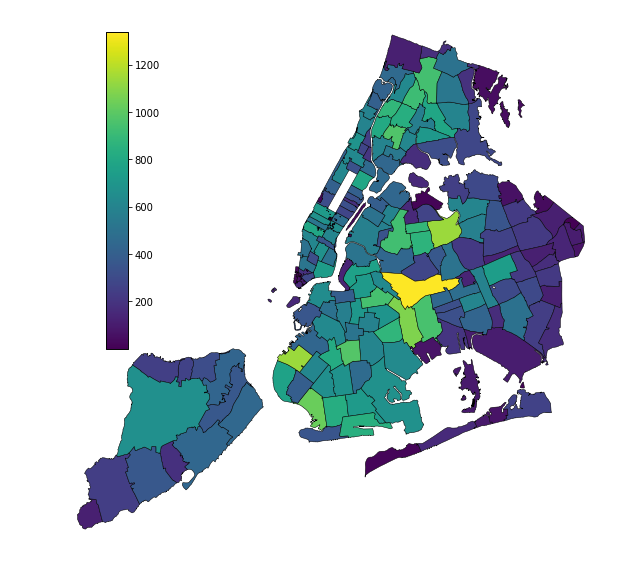

In [31]:
cp.choroplethNYC(nzips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring Renewals

In [32]:
oldlicenses = licenses[licenses["Application or Renewal"]== "Renewal"]

In [33]:
ocountzip = oldlicenses.groupby(licenses["Zip"]).count()
ocountzip["Zip"] = ocountzip.index

ozips = pd.merge(ocountzip, zipcodes, right_on = "ZIPCODE", left_on = "Zip")

ozips_ = gp.GeoDataFrame(ozips)

In [34]:
type(ocountzip.Zip.iloc[1])

str

# Number of renewal licenses by zip code

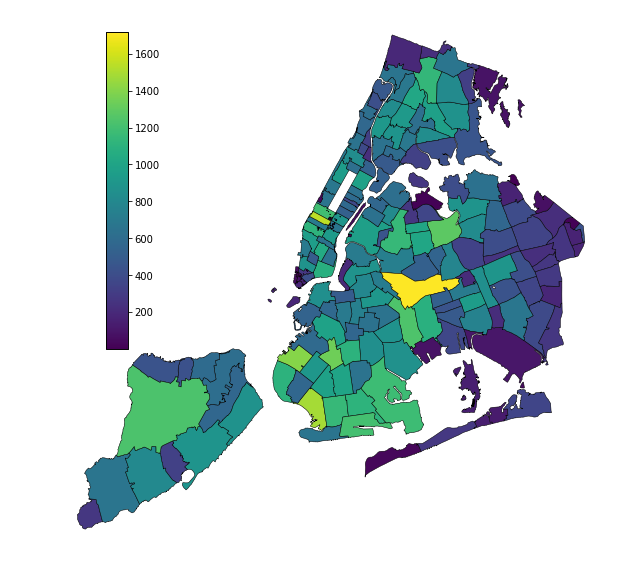

In [35]:
cp.choroplethNYC(ozips_, column="License Type", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Devide new / old

In [36]:
ozips["count_old"] = ozips["License Type"]
nzips["count_new"] = nzips["License Type"]
nzips["geometry"].drop

<bound method NDFrame.drop of 0      POLYGON ((981958.6472873986 213464.4530421346,...
1      POLYGON ((991339.8703228086 207576.7837151289,...
2      POLYGON ((989830.469142139 207048.1263078749, ...
3      POLYGON ((981197.408652395 196571.0816452205, ...
4      POLYGON ((972696.8446168154 193014.5477478057,...
5      POLYGON ((977542.4500830621 188447.2783390433,...
6      POLYGON ((971218.3702115566 190710.8587856293,...
7      POLYGON ((982595.6794779003 195880.7536295503,...
8      POLYGON ((981136.3431577235 198082.3837407082,...
9      POLYGON ((980538.9073447287 200658.5114624649,...
10     POLYGON ((991606.4032543153 205494.1464762092,...
11     POLYGON ((987500.0003778934 210146.4376965463,...
12     POLYGON ((986378.4337233901 210178.5990495533,...
13     POLYGON ((985200.0558308065 205072.0203519613,...
14     POLYGON ((983216.1014653891 203868.9381124675,...
15     POLYGON ((983985.4854253083 205856.7261316329,...
16     POLYGON ((989286.3432618976 213322.780097127, ...
1

In [37]:
df = pd.merge(ozips,nzips,on="Zip")

In [38]:
df.head(1)

Application ID_x  License Number_x  License Type_x  \
0              1113              1113          1113.0   

   Application or Renewal_x  Business Name_x  Status_x  Start Date_x  \
0                      1113             1113      1113          1113   

   End Date_x  Temp Op Letter Issued_x  Temp Op Letter Expiration_x  \
0        1106                        7                            8   

     ...            AREA_y  STATE_y  COUNTY_y  ST_FIPS_y  CTY_FIPS_y  \
0    ...      1.779494e+07       NY  New York         36         061   

                  URL_y  SHAPE_AREA_y  SHAPE_LEN_y  \
0  http://www.usps.com/           0.0          0.0   

                                          geometry_y  count_new  
0  POLYGON ((981958.6472873986 213464.4530421346,...      792.0  

[1 rows x 77 columns]

In [39]:
df["n/o"] = df["count_new"]/df["count_old"]

df_ = gp.GeoDataFrame(df)

In [40]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [41]:
df_["geometry"] = df_["geometry_x"]

# Number of new licenses / renewal licenses. 

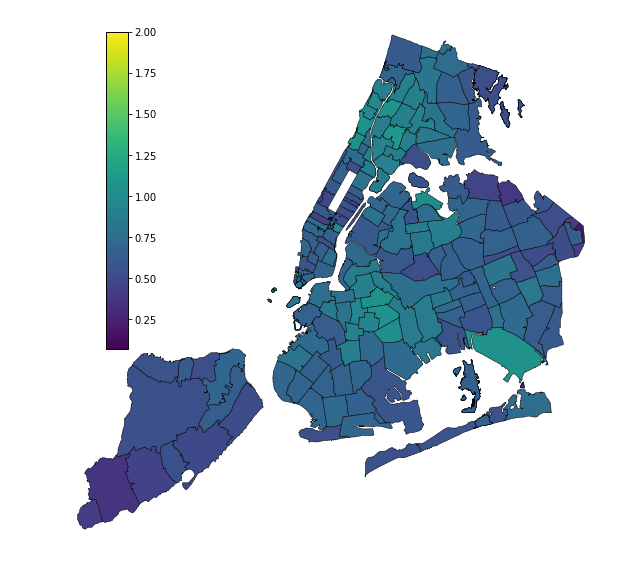

In [42]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([   8.,   16.,   81.,  114.,   48.,   10.,    1.,    1.,    1.,    2.]),
 array([ 0.07142857,  0.26428571,  0.45714286,  0.65      ,  0.84285714,
         1.03571429,  1.22857143,  1.42142857,  1.61428571,  1.80714286,  2.        ]),
 <a list of 10 Patch objects>)

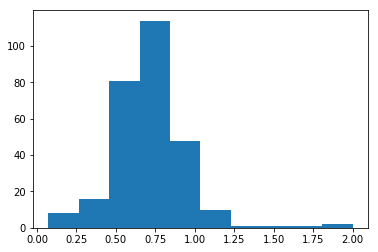

In [43]:
pl.hist(df_["n/o"])

In [44]:
df_ = df_[df_["n/o"]<1.6]

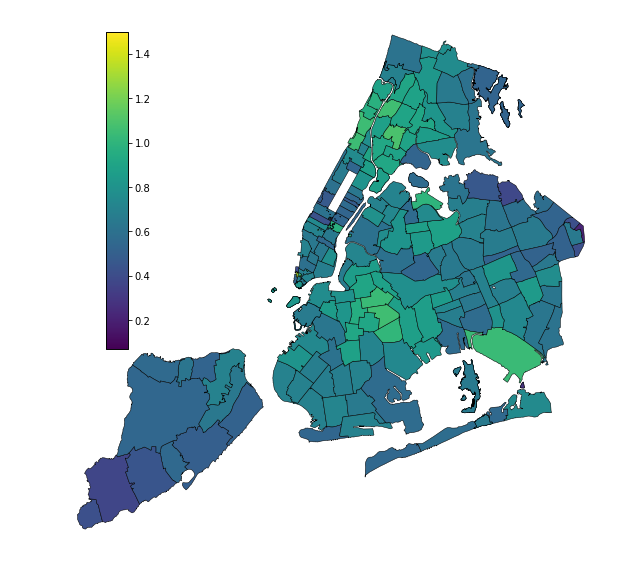

In [45]:
cp.choroplethNYC(df_, column="n/o", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [46]:
greaterthan1 = df_[df_["n/o"]>1]
smallerthan1 = df_[df_["n/o"]<1]

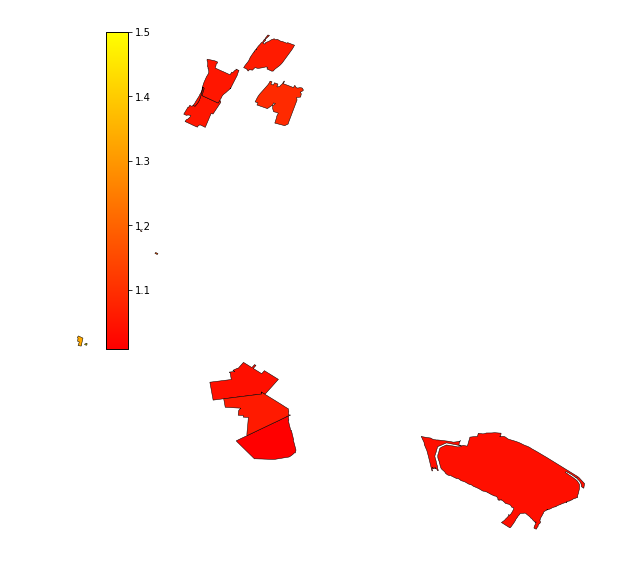

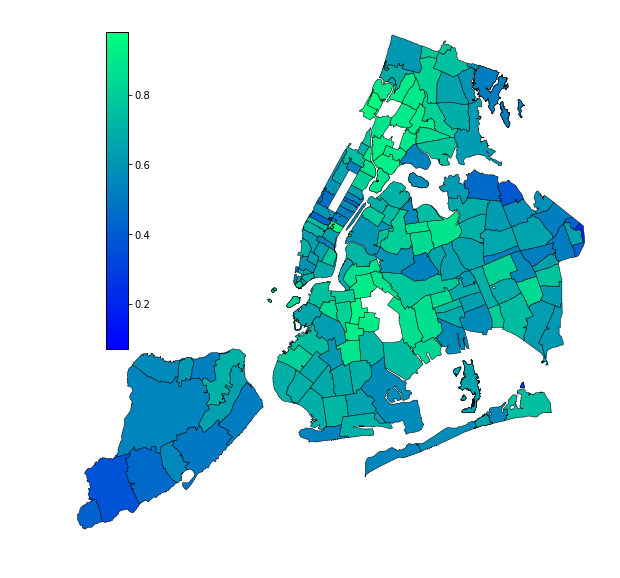

In [47]:
cp.choroplethNYC(greaterthan1, column="n/o", color="k",cmap="autumn", edgecolor="k", lw=0.5)
cp.choroplethNYC(smallerthan1, column="n/o", color="k",cmap="winter", edgecolor="k", lw=0.5);

In [48]:
zips_.head(1)

Application ID  License Number  License Type  Application or Renewal  \
0            1905            1813        1905.0                    1905   

   Business Name  Status  Start Date  End Date  Temp Op Letter Issued  \
0           1905    1905        1905      1852                     12   

   Temp Op Letter Expiration  \
0                         13   

                         ...                          POPULATION  \
0                        ...                             22413.0   

           AREA  STATE    COUNTY  ST_FIPS  CTY_FIPS                   URL  \
0  1.779494e+07     NY  New York       36       061  http://www.usps.com/   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0         0.0        0.0  POLYGON ((981958.6472873986 213464.4530421346,...  

[1 rows x 39 columns]

In [49]:
zips_["density"] = zips_["License Type"]/zips_["AREA"]
zips_["per_capita"] = zips_["License Type"]/zips_["POPULATION"]

In [50]:
zips0_ = zips_[zips_["per_capita"]<0.4]

(array([ 187.,    4.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  8.02813049e-07,   1.29073879e-04,   2.57344945e-04,
          3.85616012e-04,   5.13887078e-04,   6.42158144e-04,
          7.70429210e-04,   8.98700276e-04,   1.02697134e-03,
          1.15524241e-03,   1.28351347e-03]),
 <a list of 10 Patch objects>)

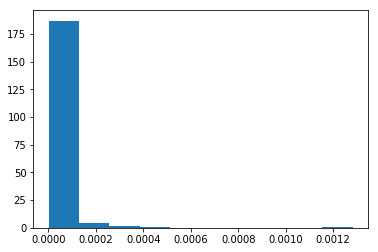

In [51]:
pl.hist(zips0_.density)

In [52]:
zips2_ = zips_[zips_["density"]<0.0004]

# Exploring number of business licenses contoled by area and population. First by area

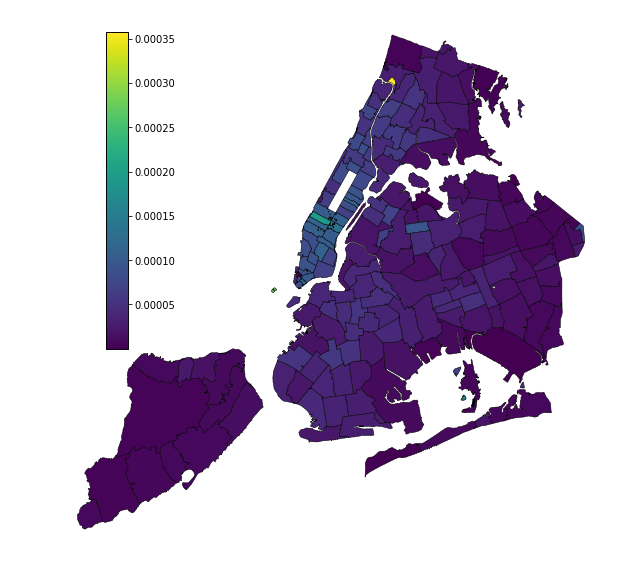

In [53]:
cp.choroplethNYC(zips2_, column="density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Now population

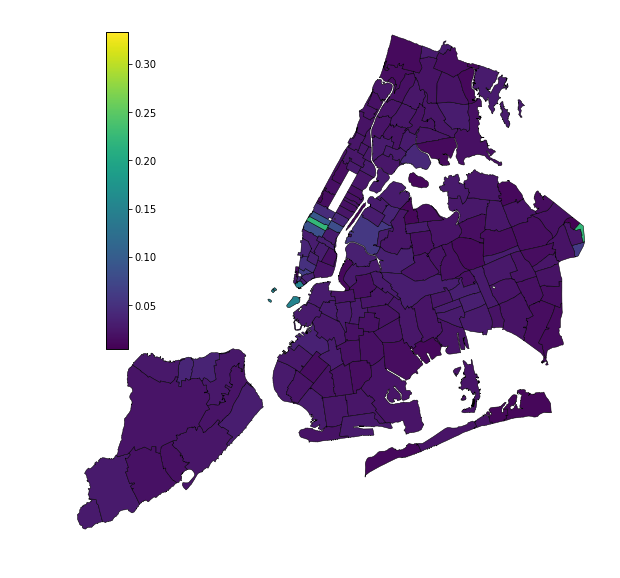

In [54]:
cp.choroplethNYC(zips0_, column="per_capita", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [55]:
zips_.columns

Index(['Application ID', 'License Number', 'License Type',
       'Application or Renewal', 'Business Name', 'Status', 'Start Date',
       'End Date', 'Temp Op Letter Issued', 'Temp Op Letter Expiration',
       'License Category', 'Application Category', 'Building Number', 'Street',
       'Street 2', 'Unit Type', 'Unit', 'Description', 'City', 'State',
       'Contact Phone', 'Longitude', 'Latitude', 'Active Vehicles', 'Zip',
       'Zips', 'ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry', 'density', 'per_capita'],
      dtype='object')

In [56]:
zips_["zip_density"] = zips_["POPULATION"] / zips_["AREA"]

In [57]:
zips3_ = zips_[zips_["zip_density"]<0.02]

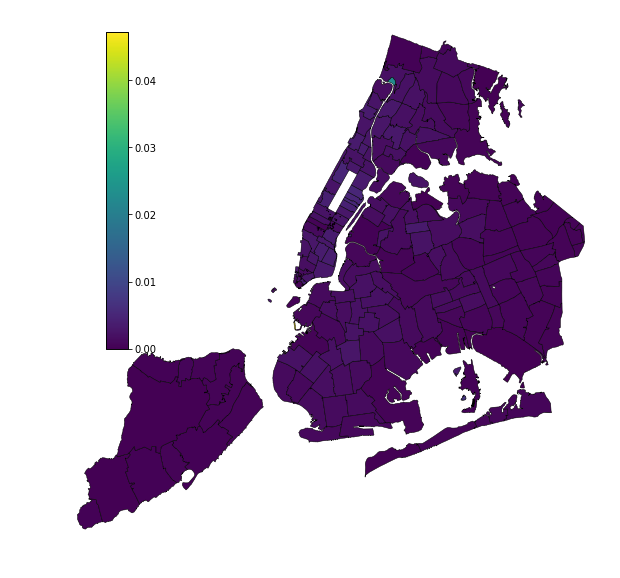

In [58]:
cp.choroplethNYC(zips_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Descriptive population, density and area by CT

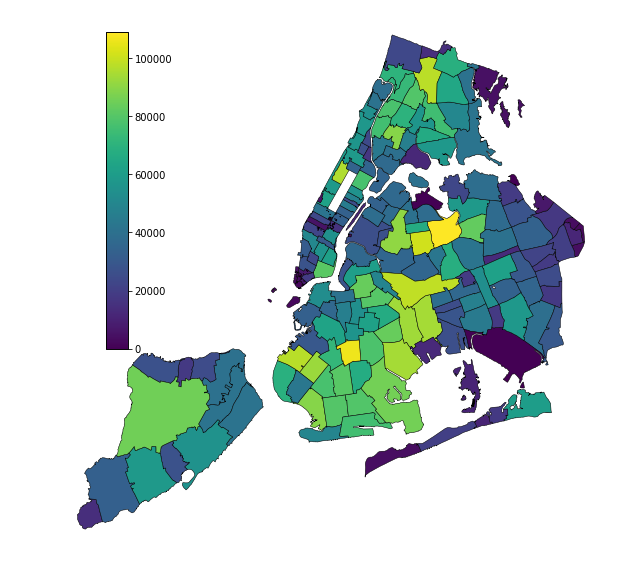

In [59]:
cp.choroplethNYC(zips_, column="POPULATION", color="k",cmap="viridis", edgecolor="k", lw=0.5);

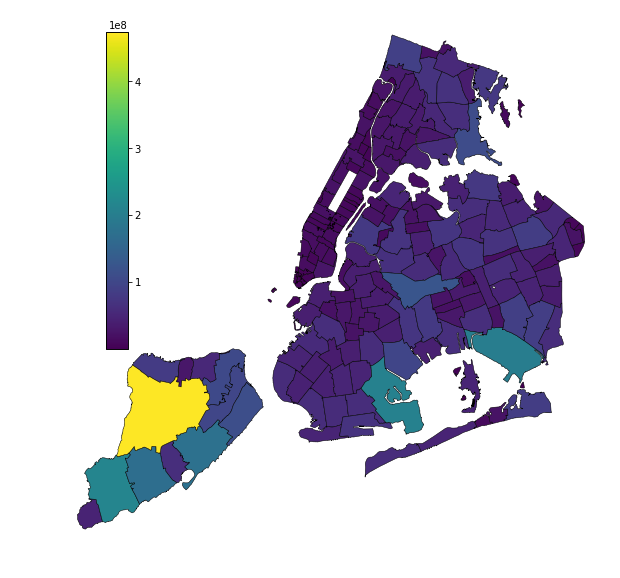

In [60]:
cp.choroplethNYC(zips_, column="AREA", color="k",cmap="viridis", edgecolor="k", lw=0.5);

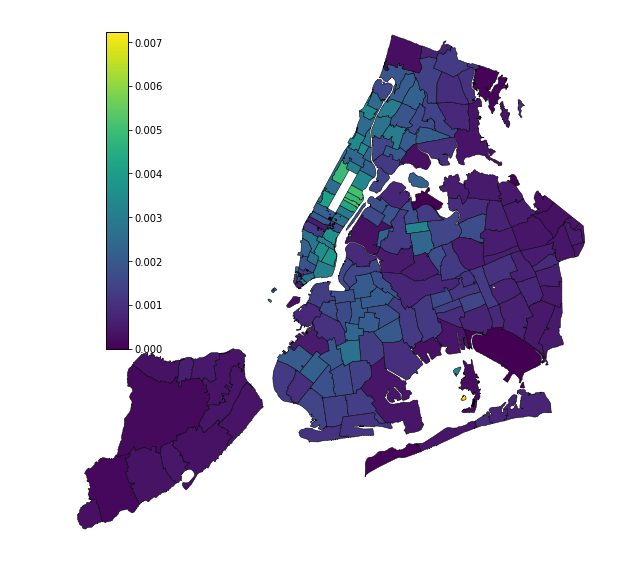

In [61]:
cp.choroplethNYC(zips3_, column="zip_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring building licenses

In [62]:
licenses = pd.read_csv("DOB_Permit_Issuance.csv")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,8,9,10,15,31,33,34,35,36,39,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

In [64]:
countzip = licenses.groupby(licenses["Zip Code"]).count()

In [65]:
countzip["Zip"] = countzip.index.astype(int)
countzip["Zips"] = countzip["Zip"].astype(str)
zips = pd.merge(countzip, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
zips_ = gp.GeoDataFrame(zips)

In [66]:
print (licenses["Residential"].unique())
print (licenses["Job Type"].unique())
print (licenses["Bldg Type"].unique())

[nan 'YES']
['A2' 'A1' 'A3' 'NB' 'DM' 'SG']
[  2.   1.  nan]


In [67]:
Residential_licenses = licenses[licenses["Residential"]=="YES"]
Non_Residential_licenses = licenses[licenses["Residential"]!="YES"]

big_bldg = licenses[licenses["Bldg Type"]==2]
small_bldg = licenses[licenses["Bldg Type"]==1]

In [68]:
new_buildings = licenses[licenses["Job Type"]=="NB"]
major_renovation = licenses[licenses["Job Type"]=="A1"]

In [69]:
countzip.head(5)

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
Zip Code                                                                      
0.0            51     51       51           51     51          51        51   
4452.0          9      9        9            9      9           9         9   
10000.0       169    169      169          169    169         169       169   
10001.0     52588  52588    52588        52588  52588       52588     52588   
10002.0     33929  33929    33929        33929  33929       33929     33929   

          Self_Cert  Block    Lot  ...    Owner's Phone #  DOBRunDate  \
Zip Code                           ...                                  
0.0              48     51     51  ...                 51          51   
4452.0            9      9      9  ...                  9           9   
10000.0          67    169    169  ...                164         169   
10001.0       33613  52585  52585  ...              51870       52588   
10002.0       22268  33929  33929  ...              33437       33929   

          PERMIT_SI_NO  LATITUDE  LONGITUDE  COUNCIL_DISTRICT  CENSUS_TRACT  \
Zip Code                                                                      
0.0                 51        51         51                51            51   
4452.0               9         0          0                 0             0   
10000.0            169       169        169               169           169   
10001.0          52588     52568      52568             52568         52568   
10002.0          33929     33887      33887             33887         33887   

          NTA_NAME    Zip   Zips  
Zip Code                          
0.0             51      0      0  
4452.0           0   4452   4452  
10000.0        169  10000  10000  
10001.0      52568  10001  10001  
10002.0      33887  10002  10002  

[5 rows x 61 columns]

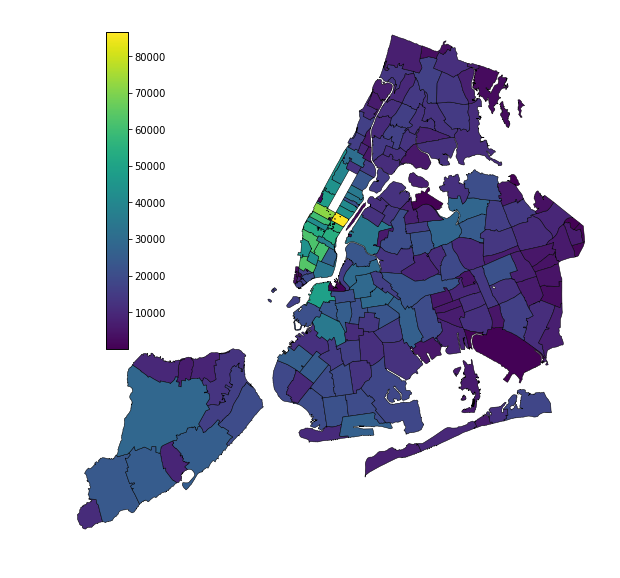

In [70]:
cp.choroplethNYC(zips_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Exploring just residential Licenses

In [71]:
countres = Residential_licenses.groupby(Residential_licenses["Zip Code"]).count()

In [72]:
countres["Zip"] = countres.index.astype(int)
countres["Zips"] = countres["Zip"].astype(str)
res = pd.merge(countres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
res_ = gp.GeoDataFrame(res)

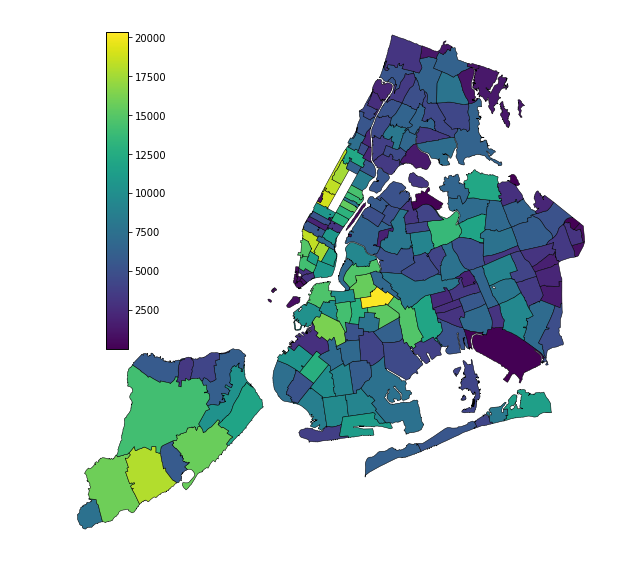

In [73]:
cp.choroplethNYC(res_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Non residential Bldgs

In [74]:
countnonres = Non_Residential_licenses.groupby(Non_Residential_licenses["Zip Code"]).count()

In [75]:
countnonres["Zip"] = countnonres.index.astype(int)
countnonres["Zips"] = countnonres["Zip"].astype(str)
nonres = pd.merge(countnonres, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nonres_ = gp.GeoDataFrame(nonres)

In [76]:
Non_Residential_licenses.head()

BOROUGH    Bin # House #       Street Name      Job #  Job doc. #  \
0   BROOKLYN  3326733    1070  EAST  104 STREET  301064023           1   
3  MANHATTAN  1036459     570  LEXINGTON AVENUE  101464835           1   
4  MANHATTAN  1015847      25         W. 32 ST.  122488478           1   
5  MANHATTAN  1000005       1    NEW YORK PLAZA  110080689           2   
6   BROOKLYN  3000259     350        JAY STREET  300673876           2   

  Job Type Self_Cert Block   Lot  \
0       A2         Y  8230     1   
3       A2       NaN  1305    60   
4       A2         Y   834    26   
5       A2         Y     4  7501   
6       A2       NaN   140    27   

                         ...                        Owner’s House State  \
0                        ...                                         NY   
3                        ...                                         NY   
4                        ...                                         NY   
5                        ...                                         NY   
6                        ...                                         NY   

   Owner’s House Zip Code  Owner's Phone #              DOBRunDate  \
0                   11101       7184728000  11/03/2017 12:00:00 AM   
3                   10022       2125571100  11/03/2017 12:00:00 AM   
4                   11354       9178283018  11/03/2017 12:00:00 AM   
5                   10004       2124830771  11/03/2017 12:00:00 AM   
6                   11375       7182633800  11/03/2017 12:00:00 AM   

  PERMIT_SI_NO   LATITUDE  LONGITUDE COUNCIL_DISTRICT CENSUS_TRACT  \
0      1238812  40.644203 -73.892264             46.0        986.0   
3       679627  40.756925 -73.972066              4.0        100.0   
4      3044504  40.747535 -73.986372              4.0         76.0   
5      1772250  40.702540 -74.012562              1.0          9.0   
6       375872  40.693524 -73.987249             33.0         11.0   

                                           NTA_NAME  
0                                          Canarsie  
3                           Turtle Bay-East Midtown  
4                             Midtown-Midtown South  
5                 Battery Park City-Lower Manhattan  
6  DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill  

[5 rows x 60 columns]

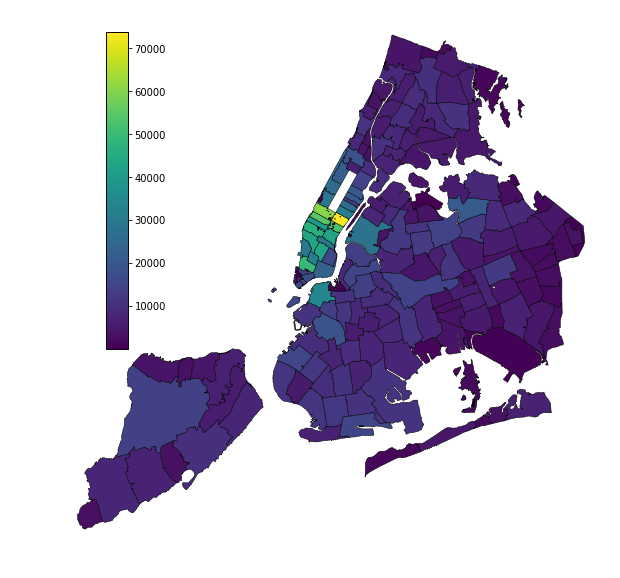

In [77]:
cp.choroplethNYC(nonres_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# New Buildings and Major renoventions

In [78]:
new_buildings_byct = new_buildings.groupby(new_buildings["Zip Code"]).count()
major_renovation_byct = major_renovation.groupby(major_renovation["Zip Code"]).count()

In [79]:
new_buildings_byct["Zip"] = new_buildings_byct.index.astype(int)
new_buildings_byct["Zips"] = new_buildings_byct["Zip"].astype(str)
nb = pd.merge(new_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
nb_ = gp.GeoDataFrame(nb)

major_renovation_byct["Zip"] = major_renovation_byct.index.astype(int)
major_renovation_byct["Zips"] = major_renovation_byct["Zip"].astype(str)
mr = pd.merge(major_renovation_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
mr_ = gp.GeoDataFrame(mr)

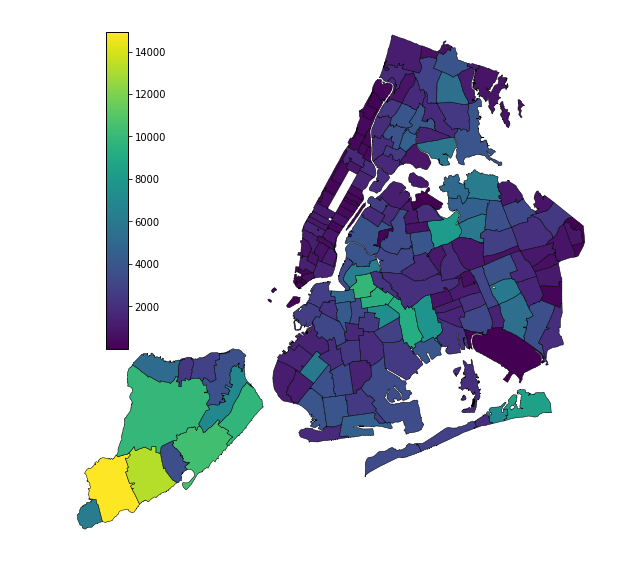

In [80]:
cp.choroplethNYC(nb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

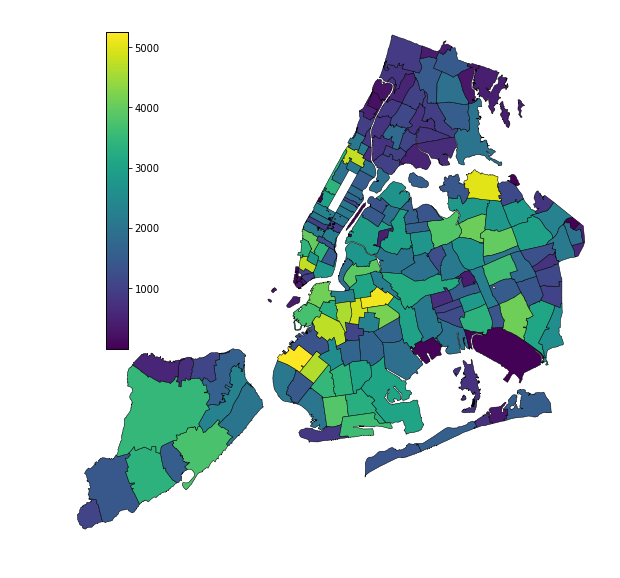

In [81]:
cp.choroplethNYC(mr_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [82]:
nb_["new_buildings_density"] = nb_["BOROUGH"] / nb_["AREA"]
mr_["major_renovation_density"] = mr_["BOROUGH"] / mr_["AREA"]

(array([ 193.,    2.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.96344877e-07,   3.78962762e-04,   7.57729180e-04,
          1.13649560e-03,   1.51526202e-03,   1.89402843e-03,
          2.27279485e-03,   2.65156127e-03,   3.03032769e-03,
          3.40909410e-03,   3.78786052e-03]),
 <a list of 10 Patch objects>)

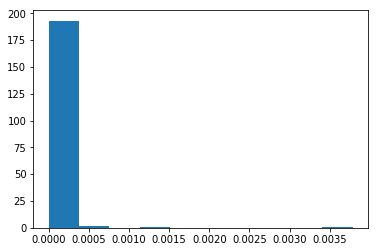

In [83]:
pl.hist(nb_.new_buildings_density)

In [84]:
nb1_ = nb_[nb_["new_buildings_density"]<0.0005]

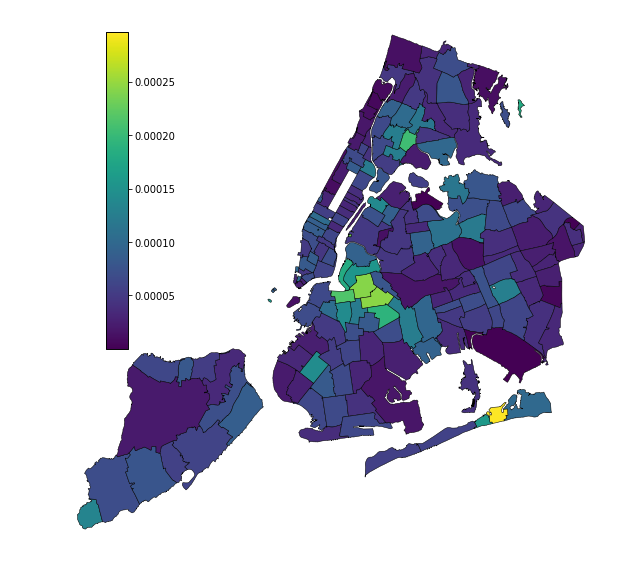

In [85]:
cp.choroplethNYC(nb1_, column="new_buildings_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

(array([ 222.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  1.40060461e-07,   5.26352334e-04,   1.05256461e-03,
          1.57877688e-03,   2.10498915e-03,   2.63120143e-03,
          3.15741370e-03,   3.68362597e-03,   4.20983825e-03,
          4.73605052e-03,   5.26226279e-03]),
 <a list of 10 Patch objects>)

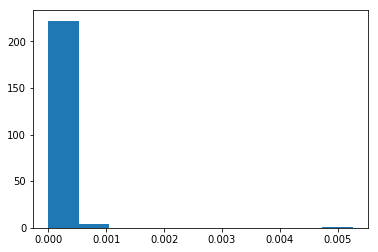

In [86]:
pl.hist(mr_.major_renovation_density)

In [87]:
mr1_ = mr_[mr_["major_renovation_density"]<0.001]

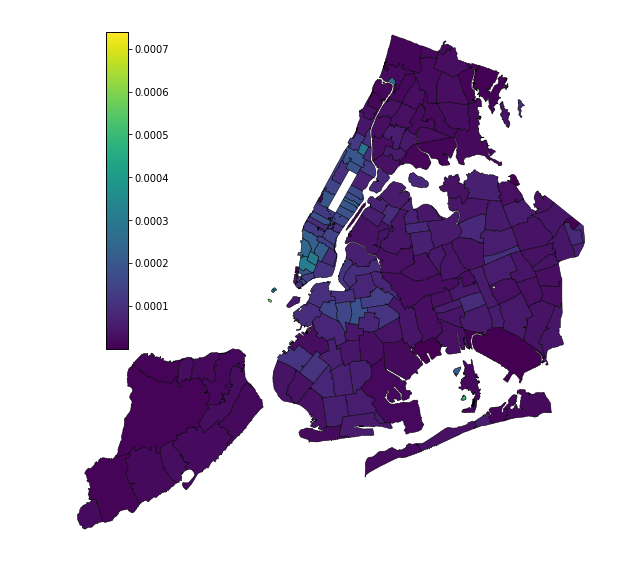

In [88]:
cp.choroplethNYC(mr1_, column="major_renovation_density", color="k",cmap="viridis", edgecolor="k", lw=0.5);

In [89]:
big_buildings_byct = big_bldg.groupby(big_bldg["Zip Code"]).count()
small_buildings_byct = small_bldg.groupby(small_bldg["Zip Code"]).count()

In [90]:
big_buildings_byct["Zip"] = big_buildings_byct.index.astype(int)
big_buildings_byct["Zips"] = big_buildings_byct["Zip"].astype(str)
bb = pd.merge(big_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
bb_ = gp.GeoDataFrame(bb)

small_buildings_byct["Zip"] = small_buildings_byct.index.astype(int)
small_buildings_byct["Zips"] = small_buildings_byct["Zip"].astype(str)
sb = pd.merge(small_buildings_byct, zipcodes, right_on = "ZIPCODE", left_on = "Zips")
sb_ = gp.GeoDataFrame(sb)

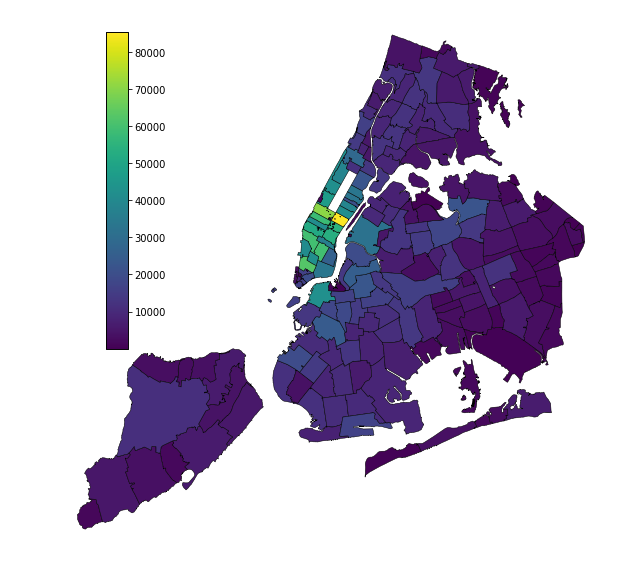

In [91]:
cp.choroplethNYC(bb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

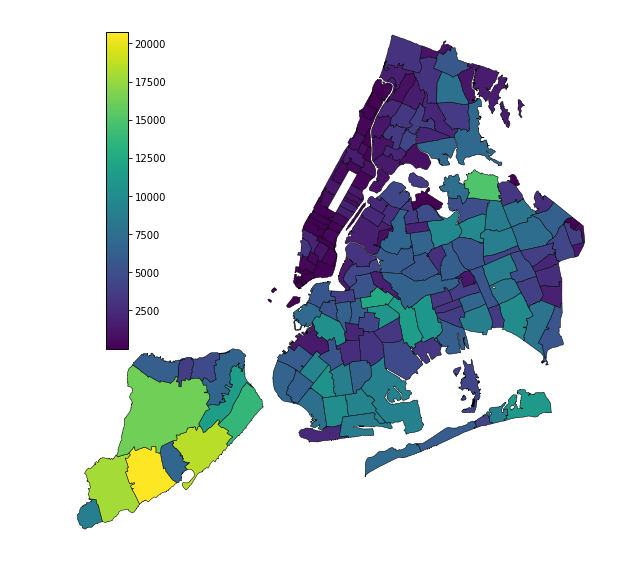

In [92]:
cp.choroplethNYC(sb_, column="BOROUGH", color="k",cmap="viridis", edgecolor="k", lw=0.5);

# Develop the index of gentrification based on business and building licenses

In [93]:
nb_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0   1540.0   1540     1540         1540   1540        1540      1540   
1   1573.0   1573     1573         1573   1573        1573      1573   
2    726.0    726      726          726    726         726       726   
3    107.0    107      107          107    107         107       107   
4    107.0    107      107          107    107         107       107   

   Self_Cert  Block   Lot          ...                    AREA  STATE  \
0       1107   1540  1540          ...            1.779494e+07     NY   
1        755   1573  1573          ...            2.628013e+07     NY   
2        351    726   726          ...            1.553838e+07     NY   
3         73    105   105          ...            4.002521e+06     NY   
4         73    105   105          ...            1.202708e+06     NY   

     COUNTY  ST_FIPS  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0  New York       36       061  http://www.usps.com/         0.0        0.0   
1  New York       36       061  http://www.usps.com/         0.0        0.0   
2  New York       36       061  http://www.usps.com/         0.0        0.0   
3  New York       36       061  http://www.usps.com/         0.0        0.0   
4  New York       36       061  http://www.usps.com/         0.0        0.0   

                                            geometry  new_buildings_density  
0  POLYGON ((981958.6472873986 213464.4530421346,...               0.000087  
1  POLYGON ((991339.8703228086 207576.7837151289,...               0.000060  
2  POLYGON ((989830.469142139 207048.1263078749, ...               0.000047  
3  POLYGON ((981197.408652395 196571.0816452205, ...               0.000027  
4  POLYGON ((972696.8446168154 193014.5477478057,...               0.000089  

[5 rows x 75 columns]

In [94]:
nb_["count_new_buildings"] = nb_["BOROUGH"]
mr_["count_major_renovation"] = mr_["BOROUGH"]

In [95]:
mr_.head()

BOROUGH  Bin #  House #  Street Name  Job #  Job doc. #  Job Type  \
0   2188.0   2188     2188         2188   2188        2188      2188   
1   2820.0   2820     2820         2820   2820        2820      2820   
2   3402.0   3402     3402         3402   3402        3402      3402   
3    387.0    387      387          387    387         387       387   
4    387.0    387      387          387    387         387       387   

   Self_Cert  Block   Lot           ...            STATE    COUNTY  ST_FIPS  \
0       1125   2188  2188           ...               NY  New York       36   
1       1172   2820  2820           ...               NY  New York       36   
2       1504   3402  3402           ...               NY  New York       36   
3        176    384   384           ...               NY  New York       36   
4        176    384   384           ...               NY  New York       36   

   CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0       061  http://www.usps.com/         0.0        0.0   
1       061  http://www.usps.com/         0.0        0.0   
2       061  http://www.usps.com/         0.0        0.0   
3       061  http://www.usps.com/         0.0        0.0   
4       061  http://www.usps.com/         0.0        0.0   

                                            geometry  \
0  POLYGON ((981958.6472873986 213464.4530421346,...   
1  POLYGON ((991339.8703228086 207576.7837151289,...   
2  POLYGON ((989830.469142139 207048.1263078749, ...   
3  POLYGON ((981197.408652395 196571.0816452205, ...   
4  POLYGON ((972696.8446168154 193014.5477478057,...   

   major_renovation_density  count_major_renovation  
0                  0.000123                  2188.0  
1                  0.000107                  2820.0  
2                  0.000219                  3402.0  
3                  0.000097                   387.0  
4                  0.000322                   387.0  

[5 rows x 76 columns]

In [392]:
mr_.shape

(227, 76)

In [96]:
mr_.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Bldg Type',
       'Residential', 'Special District 1', 'Special District 2', 'Work Type',
       'Permit Status', 'Filing Status', 'Permit Type', 'Permit Sequence #',
       'Permit Subtype', 'Oil Gas', 'Site Fill', 'Filing Date',
       'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
       'Owner

In [97]:
df_.columns

Index(['Application ID_x', 'License Number_x', 'License Type_x',
       'Application or Renewal_x', 'Business Name_x', 'Status_x',
       'Start Date_x', 'End Date_x', 'Temp Op Letter Issued_x',
       'Temp Op Letter Expiration_x', 'License Category_x',
       'Application Category_x', 'Building Number_x', 'Street_x', 'Street 2_x',
       'Unit Type_x', 'Unit_x', 'Description_x', 'City_x', 'State_x', 'Zip',
       'Contact Phone_x', 'Longitude_x', 'Latitude_x', 'Active Vehicles_x',
       'ZIPCODE_x', 'BLDGZIP_x', 'PO_NAME_x', 'POPULATION_x', 'AREA_x',
       'STATE_x', 'COUNTY_x', 'ST_FIPS_x', 'CTY_FIPS_x', 'URL_x',
       'SHAPE_AREA_x', 'SHAPE_LEN_x', 'geometry_x', 'count_old',
       'Application ID_y', 'License Number_y', 'License Type_y',
       'Application or Renewal_y', 'Business Name_y', 'Status_y',
       'Start Date_y', 'End Date_y', 'Temp Op Letter Issued_y',
       'Temp Op Letter Expiration_y', 'License Category_y',
       'Application Category_y', 'Building Number_y', 

In [98]:
Major_Renovation_ = mr_[["ZIPCODE", "POPULATION","AREA","COUNTY","count_major_renovation", "geometry"]]
New_Building_ = nb_[["ZIPCODE", "count_new_buildings"]]
Businesses_ = df_[["ZIPCODE_y", "n/o"]] 

In [395]:
print(Major_Renovation_.shape)
print(New_Building_.shape)
print(Businesses_.shape)

(227, 6)
(197, 2)
(279, 2)


In [472]:
ultimate_df = pd.merge(Major_Renovation_, New_Building_, on = "ZIPCODE")
ultimate_df = pd.merge(Businesses_, ultimate_df, right_on = "ZIPCODE", left_on = "ZIPCODE_y")

In [473]:
ultimate_df.shape

(834, 9)

In [474]:
len(ultimate_df.ZIPCODE_y.unique())

184

In [475]:
ultimate_df.head(10)

ZIPCODE_y       n/o ZIPCODE  POPULATION          AREA    COUNTY  \
0     10001  0.711590   10001     22413.0  1.779494e+07  New York   
1     10002  0.676199   10002     81305.0  2.628013e+07  New York   
2     10003  0.644699   10003     55878.0  1.553838e+07  New York   
3     10004  0.819672   10004      2187.0  4.002521e+06  New York   
4     10004  0.819672   10004      2187.0  4.002521e+06  New York   
5     10004  0.819672   10004      2187.0  4.002521e+06  New York   
6     10004  0.819672   10004      2187.0  4.002521e+06  New York   
7     10004  0.819672   10004      2187.0  1.202708e+06  New York   
8     10004  0.819672   10004      2187.0  1.202708e+06  New York   
9     10004  0.819672   10004      2187.0  1.202708e+06  New York   

   count_major_renovation                                           geometry  \
0                  2188.0  POLYGON ((981958.6472873986 213464.4530421346,...   
1                  2820.0  POLYGON ((991339.8703228086 207576.7837151289,...   
2                  3402.0  POLYGON ((989830.469142139 207048.1263078749, ...   
3                   387.0  POLYGON ((981197.408652395 196571.0816452205, ...   
4                   387.0  POLYGON ((981197.408652395 196571.0816452205, ...   
5                   387.0  POLYGON ((981197.408652395 196571.0816452205, ...   
6                   387.0  POLYGON ((981197.408652395 196571.0816452205, ...   
7                   387.0  POLYGON ((972696.8446168154 193014.5477478057,...   
8                   387.0  POLYGON ((972696.8446168154 193014.5477478057,...   
9                   387.0  POLYGON ((972696.8446168154 193014.5477478057,...   

   count_new_buildings  
0               1540.0  
1               1573.0  
2                726.0  
3                107.0  
4                107.0  
5                107.0  
6                107.0  
7                107.0  
8                107.0  
9                107.0

In [476]:
ultimate_df = ultimate_df.drop_duplicates("ZIPCODE")

# INDEX

### Gent = (K * N/0) * ((1.5 * NB + MR) / Area ** 0.5)

In [477]:
ultimate_df.head()

ZIPCODE_y       n/o ZIPCODE  POPULATION          AREA    COUNTY  \
0       10001  0.711590   10001     22413.0  1.779494e+07  New York   
1       10002  0.676199   10002     81305.0  2.628013e+07  New York   
2       10003  0.644699   10003     55878.0  1.553838e+07  New York   
3       10004  0.819672   10004      2187.0  4.002521e+06  New York   
259     10005  0.648810   10005      8107.0  2.082901e+06  New York   

     count_major_renovation  \
0                    2188.0   
1                    2820.0   
2                    3402.0   
3                     387.0   
259                   371.0   

                                              geometry  count_new_buildings  
0    POLYGON ((981958.6472873986 213464.4530421346,...               1540.0  
1    POLYGON ((991339.8703228086 207576.7837151289,...               1573.0  
2    POLYGON ((989830.469142139 207048.1263078749, ...                726.0  
3    POLYGON ((981197.408652395 196571.0816452205, ...                107.0  
259  POLYGON ((982595.6794779003 195880.7536295503,...                 60.0

In [478]:
ultimate_df["renovation_index"] = 100 * ultimate_df["n/o"] * (ultimate_df["count_new_buildings"] * 1.5 + ultimate_df["count_major_renovation"]) / ultimate_df["AREA"]**0.5
                                   
                                   
                                   
                                   

In [479]:
ultimate_df.shape

(184, 10)

In [480]:
ultimate_df_ = gp.GeoDataFrame(ultimate_df)

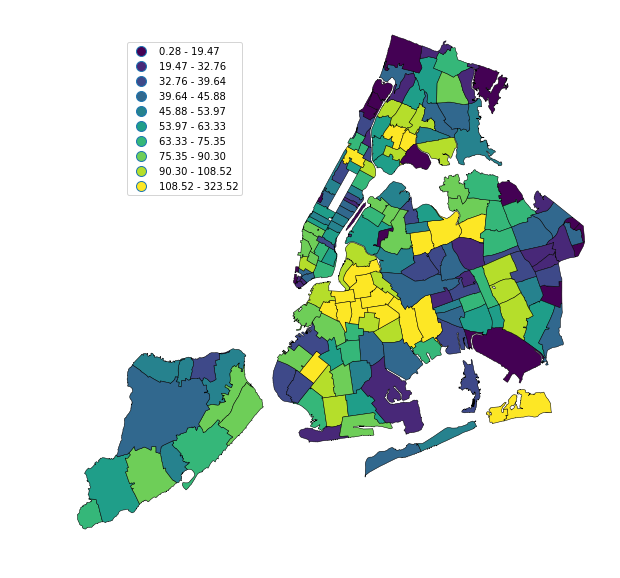

In [481]:
cp.choroplethNYC(ultimate_df_, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");





# Read Zillow rent prices

In [482]:
rent_price = pd.read_csv("Zip_rent.csv")

In [483]:
rent_price.head()

RegionID  RegionName         City State              Metro CountyName  \
0     61639       10025     New York    NY           New York   New York   
1     84654       60657      Chicago    IL            Chicago       Cook   
2     61637       10023     New York    NY           New York   New York   
3     90668       75070     McKinney    TX  Dallas-Fort Worth     Collin   
4     91982       77494  Cinco Ranch    TX            Houston  Fort Bend   

   SizeRank  2010-11  2010-12  2011-01  2011-02  2011-03  2011-04  2011-05  \
0         1      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1         2   1731.0   1742.0   1750.0   1750.0   1740.0   1733.0   1724.0   
2         3      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3         4   1577.0   1576.0   1582.0   1584.0   1586.0   1585.0   1584.0   
4         5   2184.0   2185.0   2181.0   2184.0   2193.0   2211.0   2222.0   

   2011-06  2011-07  2011-08  2011-09  2011-10  2011-11  2011-12  2012-01  \
0      NaN      NaN      NaN      NaN      NaN      NaN   2963.0   2970.0   
1   1719.0   1712.0   1722.0   1742.0   1759.0   1774.0   1782.0   1781.0   
2      NaN      NaN      NaN      NaN      NaN      NaN   3212.0   3183.0   
3   1584.0   1589.0   1597.0   1604.0   1612.0   1620.0   1627.0   1628.0   
4   2223.0   2224.0   2241.0   2270.0   2308.0   2327.0   2325.0   2299.0   

   2012-02  2012-03  2012-04  2012-05  2012-06  2012-07  2012-08  2012-09  \
0   2997.0   3012.0   3010.0   2997.0   2979.0   2975.0   3013.0   3064.0   
1   1782.0   1783.0   1794.0   1804.0   1806.0   1813.0   1804.0   1799.0   
2   3208.0   3240.0   3267.0   3291.0   3286.0   3288.0   3302.0   3334.0   
3   1629.0   1633.0   1639.0   1646.0   1652.0   1660.0   1667.0   1673.0   
4   2265.0   2247.0   2245.0   2270.0   2308.0   2347.0   2354.0   2340.0   

   2012-10  2012-11  2012-12  2013-01  2013-02  2013-03  2013-04  2013-05  \
0   3085.0   3082.0   3111.0   3151.0   3165.0   3168.0   3182.0   3225.0   
1   1792.0   1801.0   1806.0   1814.0   1820.0   1837.0   1855.0   1876.0   
2   3354.0   3347.0   3343.0   3334.0   3313.0   3336.0   3375.0   3445.0   
3   1677.0   1683.0   1687.0   1692.0   1698.0   1703.0   1708.0   1715.0   
4   2303.0   2277.0   2270.0   2290.0   2317.0   2344.0   2361.0   2371.0   

   2013-06  2013-07  2013-08  2013-09  2013-10  2013-11  2013-12  2014-01  \
0   3272.0   3297.0   3257.0   3211.0   3215.0   3238.0   3296.0   3338.0   
1   1889.0   1908.0   1922.0   1922.0   1913.0   1906.0   1910.0   1921.0   
2   3465.0   3477.0   3438.0   3428.0   3441.0   3484.0   3555.0   3601.0   
3   1723.0   1733.0   1738.0   1746.0   1751.0   1757.0   1762.0   1770.0   
4   2375.0   2376.0   2376.0   2380.0   2398.0   2425.0   2459.0   2486.0   

   2014-02  2014-03  2014-04  2014-05  2014-06  2014-07  2014-08  2014-09  \
0   3381.0   3398.0   3381.0   3376.0   3361.0   3384.0   3409.0   3450.0   
1   1935.0   1941.0   1943.0   1944.0   1945.0   1951.0   1965.0   1987.0   
2   3614.0   3581.0   3550.0   3557.0   3562.0   3599.0   3647.0   3713.0   
3   1779.0   1785.0   1789.0   1790.0   1790.0   1791.0   1795.0   1804.0   
4   2504.0   2511.0   2509.0   2502.0   2497.0   2492.0   2498.0   2510.0   

   2014-10  2014-11  2014-12  2015-01  2015-02  2015-03  2015-04  2015-05  \
0   3491.0   3537.0   3543.0   3541.0   3551.0   3585.0   3655.0   3694.0   
1   2006.0   2032.0   2039.0   2035.0   2027.0   2018.0   2009.0   1995.0   
2   3813.0   3904.0   3974.0   4012.0   4059.0   4059.0   4069.0   4039.0   
3   1811.0   1822.0   1833.0   1843.0   1856.0   1869.0   1886.0   1895.0   
4   2519.0   2517.0   2511.0   2509.0   2510.0   2513.0   2511.0   2509.0   

   2015-06  2015-07  2015-08  2015-09  2015-10  2015-11  2015-12  2016-01  \
0   3730.0   3715.0   3718.0   3706.0   3675.0   3641.0   3618.0     3623   
1   1988.0   1978.0   1959.0   1942.0   1938.0   1938.0   1945.0     1961   
2   4084.0   4083.0   4099.0   4053.0   3974.0   3925.0   3897.0    

In [484]:
rent_price.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03',
       '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
       '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03',
       '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09',
       '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03',
       '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09',
       '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
       '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
       '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03',
       '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09',
       '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09',
       '2016-10', '2016-11', '2016-12', '2017-01',

In [485]:
print (type(rent_price.RegionName.iloc[2]))
print (type(ultimate_df_.ZIPCODE.iloc[2]))

<class 'numpy.int64'>
<class 'str'>


In [486]:
rent_price["ZIPCODE"] = rent_price.RegionName.astype(str)

In [487]:
final_index_data = pd.merge(rent_price, ultimate_df_, on = "ZIPCODE")

In [488]:
ultimate_df_.shape

(184, 10)

In [489]:
final_index_data.shape

(162, 105)

In [490]:
final_index_data["increase_3_year"] = final_index_data["2017-12"] / final_index_data["2014-12"] 
final_index_data["increase_2_year"] = final_index_data["2017-12"] / final_index_data["2015-12"] 

In [491]:
final_index_data_ = gp.GeoDataFrame(final_index_data)

### Gent = (K x N/0) x (Rent(2017-12) / Rent(2014-12)) x ((1.5 * NB + MR) / Area ^ 0.5)

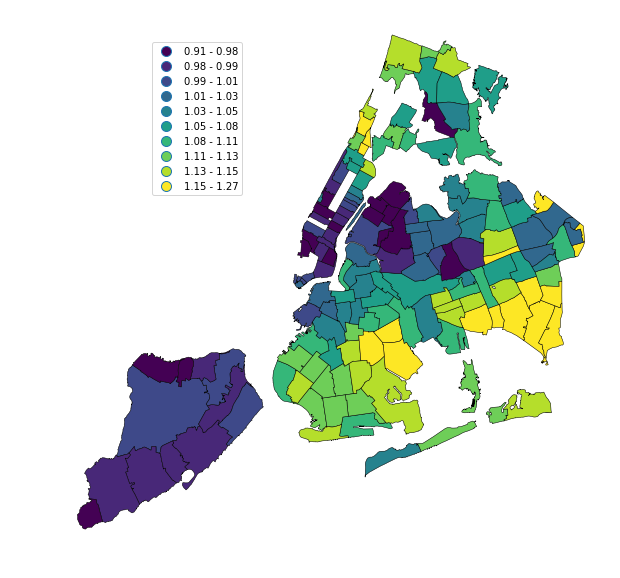

In [492]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


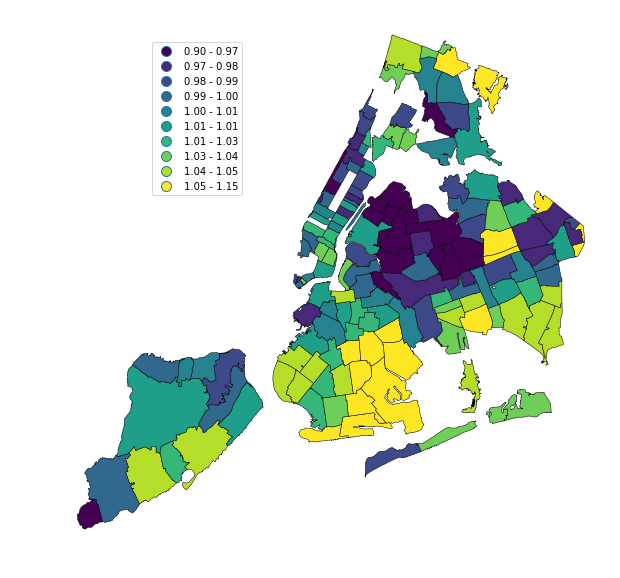

In [493]:
cp.choroplethNYC(final_index_data_, column="increase_2_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


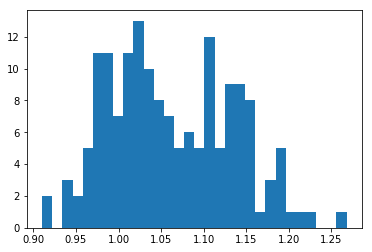

In [494]:
pl.hist(final_index_data_.increase_3_year, bins=30);

In [495]:
final_index_data_["renovation_index_with_rent"] = 100 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] * 1.5 + final_index_data_["count_major_renovation"]) / final_index_data_["AREA"]**0.5




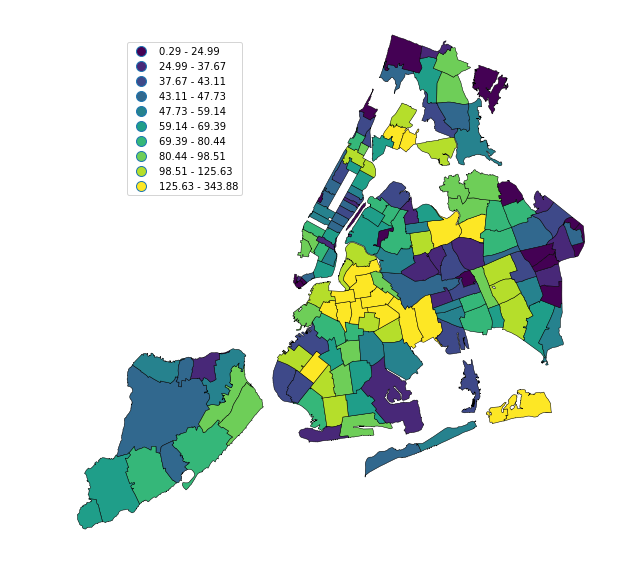

In [496]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


# Now we try to do it with home value instead of rent

In [497]:
home_value = pd.read_csv("Zip_home_value.csv")

In [498]:
home_value.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10',
       '2017-11', '2017-12', '2018-01', '2018-02'],
      dtype='object', length=270)

In [499]:
print (type(home_value.RegionName.iloc[2]))
print (type(ultimate_df_.ZIPCODE.iloc[2]))

<class 'numpy.int64'>
<class 'str'>


In [500]:
home_value["ZIPCODE"] = home_value.RegionName.astype(str)

In [501]:
final_index_data1 = pd.merge(home_value, ultimate_df_, on = "ZIPCODE")

In [502]:
final_index_data1["increase_3_year"] = final_index_data1["2017-12"] / final_index_data1["2014-12"] 
final_index_data1["increase_2_year"] = final_index_data1["2017-12"] / final_index_data1["2015-12"] 

In [503]:
final_index_data_ = gp.GeoDataFrame(final_index_data)

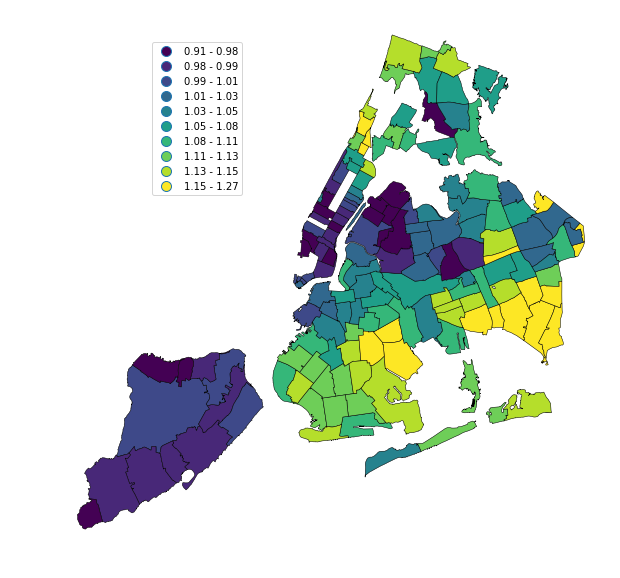

In [504]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");


In [505]:
final_index_data_["renovation_index_with_rent"] = 100 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] * 1.5 + final_index_data_["count_major_renovation"]) / final_index_data_["AREA"]**0.5


Text(0.5,1,'Gentrification Index in NYC by Zip Code\n')

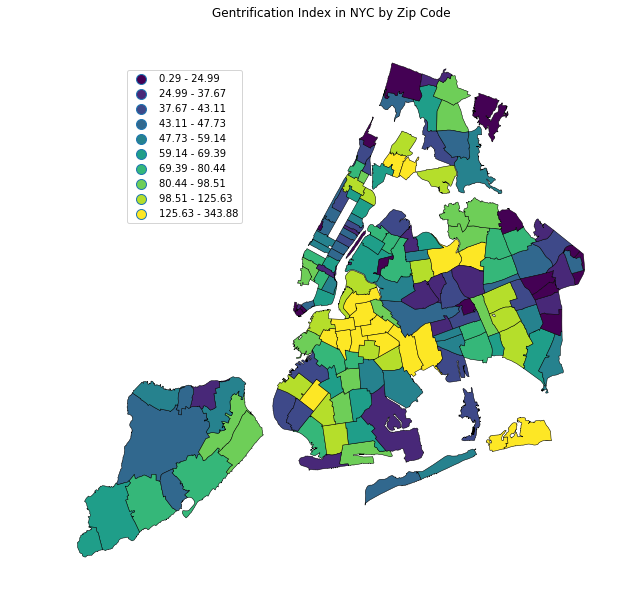

In [506]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme = "QUANTILES");
pl.title("Gentrification Index in NYC by Zip Code\n")

In [507]:
licenses.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

# VALIDATION

In [508]:
furman = pd.read_csv("https://raw.githubusercontent.com/CUSPcapstones/Digital-Traces-of-Gentrification_2018/master/notebooks/ReproduceMapGentrification/gentrification.csv?token=AcyV_LsCZed6mpfv9I65uIw4jRDZ7daNks5bBCWPwA%3D%3D")

In [509]:
furman.describe()

Unnamed: 0       zipcode  gentrification
count  237.000000    237.000000      237.000000
mean   118.000000  10624.603376        1.717300
std     68.560193    986.583432        0.560187
min      0.000000     83.000000        0.000000
25%     59.000000  10120.000000        2.000000
50%    118.000000  10468.000000        2.000000
75%    177.000000  11241.000000        2.000000
max    236.000000  11697.000000        2.000000

In [510]:
furman_useful = furman[furman["gentrification"]!=2]

In [511]:
furman_useful.describe()

Unnamed: 0       zipcode  gentrification
count   54.000000     54.000000       54.000000
mean   108.462963  10672.351852        0.759259
std     54.567498    511.874253        0.431548
min      6.000000  10002.000000        0.000000
25%     41.250000  10039.250000        1.000000
50%    120.000000  10470.000000        1.000000
75%    151.750000  11213.750000        1.000000
max    197.000000  11370.000000        1.000000

In [512]:
furman_useful.head()

Unnamed: 0  zipcode  gentrification
6            6    10002               1
7            7    10003               1
12          12    10009               1
28          28    10026               1
29          29    10027               1

In [513]:
final_index_data.ZIPCODE.head()

0    10025
1    10023
2    10002
3    10467
4    11226
Name: ZIPCODE, dtype: object

In [514]:
print (type(furman_useful.zipcode.iloc[1]))
print (type(final_index_data_.ZIPCODE.iloc[1]))

<class 'numpy.int64'>
<class 'str'>


In [515]:
furman_useful["ZIPCODE"] = furman_useful.zipcode.astype(str)
furman["ZIPCODE"] = furman.zipcode.astype(str)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [516]:
validation = pd.merge(furman, final_index_data_, on = "ZIPCODE")

In [517]:
validation.head()

Unnamed: 0  zipcode  gentrification ZIPCODE  RegionID  RegionName  \
0           5    10001               2   10001     61615       10001   
1           6    10002               1   10002     61616       10002   
2           7    10003               1   10003     61617       10003   
3           8    10004               2   10004     61618       10004   
4           9    10005               2   10005     61619       10005   

       City State     Metro CountyName  SizeRank  2010-11  2010-12  2011-01  \
0  New York    NY  New York   New York      1786      NaN      NaN      NaN   
1  New York    NY  New York   New York         9      NaN      NaN      NaN   
2  New York    NY  New York   New York        45      NaN      NaN      NaN   
3  New York    NY  New York   New York     11103      NaN      NaN      NaN   
4  New York    NY  New York   New York      7161      NaN      NaN      NaN   

   2011-02  2011-03  2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  \
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

   2011-10  2011-11  2011-12  2012-01  2012-02  2012-03  2012-04  2012-05  \
0      NaN      NaN   3291.0   3264.0   3283.0   3310.0   3343.0   3359.0   
1      NaN      NaN   3091.0   3088.0   3113.0   3111.0   3129.0   3161.0   
2      NaN      NaN   3337.0   3286.0   3286.0   3313.0   3336.0   3362.0   
3      NaN      NaN   3509.0   3515.0   3558.0   3572.0   3596.0   3628.0   
4      NaN      NaN   3336.0   3331.0   3358.0   3370.0   3405.0   3428.0   

   2012-06  2012-07  2012-08  2012-09  2012-10  2012-11  2012-12  2013-01  \
0   3344.0   3336.0   3350.0   3375.0   3412.0   3411.0   3420.0   3408.0   
1   3190.0   3208.0   3221.0   3230.0   3250.0   3266.0   3270.0   3265.0   
2   3362.0   3368.0   3385.0   3405.0   3424.0   3421.0   3418.0   3406.0   
3   3637.0   3649.0   3646.0   3669.0   3690.0   3673.0   3675.0   3612.0   
4   3435.0   3439.0   3441.0   3452.0   3486.0   3516.0   3545.0   3514.0   

   2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  2013-08  2013-09  \
0   3387.0   3369.0   3380.0   3432.0   3467.0   3481.0   3452.0   3470.0   
1   3245.0   3241.0   3249.0   3284.0   3309.0   3296.0   3256.0   3228.0   
2   3381.0   3366.0   3388.0   3462.0   3524.0   3525.0   3478.0   3480.0   
3   3574.0   3560.0   3600.0   3666.0   3692.0   3703.0   3668.0   3660.0   
4   3490.0   3476.0   3488.0   3516.0   3526.0   3532.0   3505.0   3497.0   

   2013-10  2013-11  2013-12  2014-01  2014-02  2014-03  2014-04  2014-05  \
0   3523.0   3578.0   3629.0   3647.0   3657.0   3624.0   3614.0   3613.0   
1   3263.0   3323.0   3380.0   3407.0   3427.0   3434.0   3446.0   3451.0   
2   3539.0   3611.0   3667.0   3694.0   3702.0   3660.0   3647.0   3654.0   
3   3667.0   3684.0   3702.0   3748.0   3797.0   3824.0   3816.0   3783.0   
4   3507.0   3527.0   3528.0   3534.0   3567.0   3605.0   3627.0   3604.0   

   2014-06  2014-07  2014-08  2014-09  2014-10  2014-11  2014-12  2015-01  \
0   3619.0   3649.0   3705.0   3744.0   3815.0   3880.0   3945.0   3998.0   
1   3459.0   3506.0   3571.0   3639.0   3719.0   3784.0   3836.0   3865.0   
2   3668.0   3716.0   3788.0   3866.0   3990.0   4110.0   4226.0   4282.0   
3   3787.0   3830.0   3918.0   3958.0   3995.0   4055.0   4101.0   4138.0   
4   3611.0   3632.0   3702.0   3733.0   3798.0   3831.0   3860.0   3876.0   

   2015-02  2015-03  2015-04  2015-05  2015-06  2015-07  2015-08  2015-09  \
0   4062.0   4109.0   4125.0   4097.0   4085.0   4058.0   4055.0   4042.0   
1   3900.0   3913.0   3924.0   3911.0   3908.0   3889.0   3886.0   3864.0   
2   4349.0   4392.0   4408.0   4364.0   4343.0   4334.0   4353.0   4329.0   
3   4145.

In [518]:
validation = gp.GeoDataFrame(validation)

Text(0.5,1,'Furman')

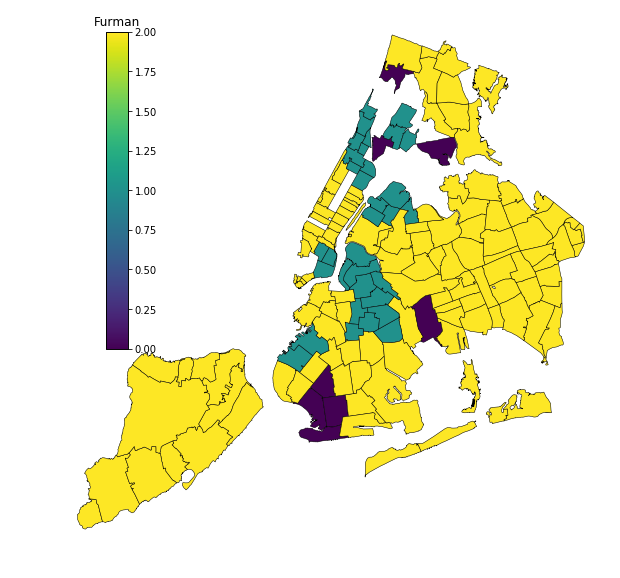

In [519]:
cp.choroplethNYC(validation, column="gentrification", color="k",cmap="viridis", edgecolor="k", lw=0.5);
pl.title("Furman")

In [520]:
validation.gentrification.value_counts()

2.0    121
1.0     33
0.0      8
Name: gentrification, dtype: int64

In [521]:
from sklearn.linear_model import LogisticRegression

In [522]:
validation1  = validation[validation["gentrification"]!=2]

In [523]:
validation1.shape

(41, 111)

In [524]:
X = validation1.renovation_index_with_rent
Y = validation1.gentrification

In [525]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.491473
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            0
Date:                Fri, 18 May 2018   Pseudo R-squ.:                0.004239
Time:                        13:47:11   Log-Likelihood:                -20.150
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
renovation_index_with_rent     0.0141      0.004      3.180      0.001      

In [526]:
pd.set_option('display.max_columns', None)

In [528]:
cols=["n/o", "increase_3_year", "count_major_renovation", "count_new_buildings", "AREA", "POPULATION"] 
X1=validation1[cols]
Y1=validation1['gentrification']

In [529]:
logit_model1=sm.Logit(Y1,X1)
result=logit_model1.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.178388
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       35
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 May 2018   Pseudo R-squ.:                  0.6386
Time:                        13:47:11   Log-Likelihood:                -7.3139
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                 9.565e-05
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
n/o                       15.3869      8.124      1.894      0.058        -0.535    

In [530]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [531]:
data_final_vars=validation1.columns.values.tolist()
Y=['gentrification']
X=["count_major_renovation", "n/o", "count_new_buildings", "increase_3_year", "increase_2_year", "AREA", "POPULATION"]

In [532]:
logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(validation1[X], validation1[Y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [533]:
cols=["n/o", "increase_3_year", "count_major_renovation", "count_new_buildings", "AREA", "POPULATION", "increase_2_year"] 
X2=validation1[cols]
Y2=validation1['gentrification']

In [534]:
logit_model2=sm.Logit(Y2,X2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.491473
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       40
Method:                           MLE   Df Model:                            0
Date:                Fri, 18 May 2018   Pseudo R-squ.:                0.004239
Time:                        13:47:12   Log-Likelihood:                -20.150
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                       nan
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
renovation_index_with_rent     0.0141      0.004      3.180      0.001      

In [535]:
validation1.gentrification.mean()

0.80487804878048785

In [540]:
X = validation1.renovation_index_with_rent
Y = validation1.gentrification

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

In [542]:
logreg = LogisticRegression()

In [545]:
X_train.shape

(20,)

In [546]:
y_train = y_train.reshape((20,1))
X_train = X_train.reshape((20,1))

In [547]:
logreg.fit(X_train, y_train)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [550]:
X_test.shape

(21,)

In [551]:
X_test = X_test.reshape(21,1)

In [552]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


In [553]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 0  3]
 [ 0 18]]


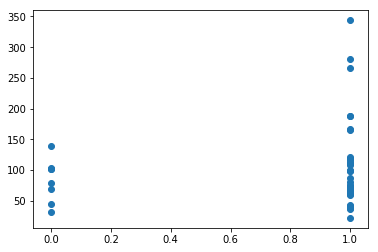

In [554]:
pl.scatter(validation1.gentrification, validation1.renovation_index_with_rent)

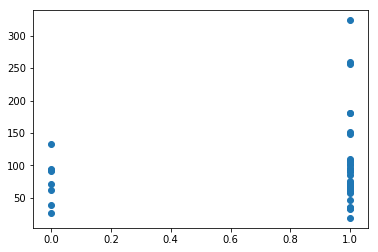

In [555]:
pl.scatter(validation1.gentrification, validation1.renovation_index)

In [556]:
validation1.groupby("gentrification").mean()

Unnamed: 0       zipcode     RegionID    RegionName  \
gentrification                                                        
0.0             137.500000  10932.500000  61941.87500  10932.500000   
1.0             105.090909  10707.606061  61866.69697  10707.606061   

                   SizeRank  2010-11  2010-12  2011-01  2011-02  2011-03  \
gentrification                                                             
0.0              427.250000      NaN      NaN      NaN      NaN      NaN   
1.0             1311.575758      NaN      NaN      NaN      NaN      NaN   

                2011-04  2011-05  2011-06  2011-07  2011-08  2011-09  2011-10  \
gentrification                                                                  
0.0                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1.0                 NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                2011-11      2011-12      2012-01      2012-02      2012-03  \
gentrification                                                                
0.0                 NaN  1587.750000  1588.625000  1592.000000  1598.250000   
1.0                 NaN  2011.606061  2013.787879  2022.969697  2039.454545   

                    2012-04      2012-05      2012-06      2012-07  \
gentrification                                                       
0.0             1603.875000  1614.250000  1627.250000  1640.250000   
1.0             2061.060606  2084.363636  2097.969697  2103.090909   

                    2012-08      2012-09      2012-10      2012-11  \
gentrification                                                       
0.0             1652.625000  1653.000000  1650.375000  1643.750000   
1.0             2102.363636  2099.545455  2092.454545  2093.878788   

                    2012-12     2013-01      2013-02      2013-03  \
gentrification                                                      
0.0             1647.125000  1650.12500  1655.375000  1659.875000   
1.0             2100.878788  2112.69697  2131.333333  2145.878788   

                    2013-04      2013-05      2013-06      2013-07  \
gentrification                                                       
0.0             1671.000000  1690.625000  1711.000000  1726.250000   
1.0             2162.666667  2178.666667  2193.121212  2215.272727   

                    2013-08      2013-09      2013-10      2013-11  \
gentrification                                                       
0.0             1726.500000  1722.750000  1716.000000  1721.250000   
1.0             2227.424242  2245.151515  2254.848485  2276.181818   

                    2013-12      2014-01      2014-02      2014-03  \
gentrification                                                       
0.0             1732.375000  1748.625000  1767.125000  1777.625000   
1.0             2289.515152  2309.424242  2321.818182  2333.757576   

                    2014-04      2014-05      2014-06      2014-07  \
gentrification                                                       
0.0             1787.250000  1789.625000  1796.000000  1808.750000   
1.0             2346.636364  2354.757576  2362.727273  2370.909091   

                    2014-08     2014-09      2014-10      2014-11  \
gentrification                                                      
0.0             1823.625000  1849.75000  1872.750000  1895.250000   
1.0             2388.939394  2418.69697  2453.606061  2490.909091   

                    2014-12      2015-01      2015-02      2015-03  \
gentrification                                                       
0.0             1904.125000  1901.000000  1901.750000  1921.750000   
1.0             2518.242424  2543.515152  2565.878788  2583.969697   

                    2015-04      2015-05      2015-06      2015-07  \
gentrification                                                       
0.0             1941.375000  1955.750000  1966.250000  1973.375000   
1.0             2600.363636  2609.151515  2619.333333

In [557]:
cols=["n/o", "count_major_renovation"] 
X3=validation1[cols]
Y3=validation1['gentrification']

In [558]:
logit_model3=sm.Logit(Y3,X3)
result=logit_model3.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465516
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:         gentrification   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 May 2018   Pseudo R-squ.:                 0.05683
Time:                        13:55:44   Log-Likelihood:                -19.086
converged:                       True   LL-Null:                       -20.236
                                        LLR p-value:                    0.1294
                             coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
n/o                        1.2878      0.980      1.314      0.189        -0.634    

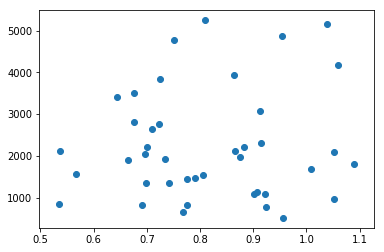

In [559]:
pl.scatter(validation1["n/o"], validation1.count_major_renovation)

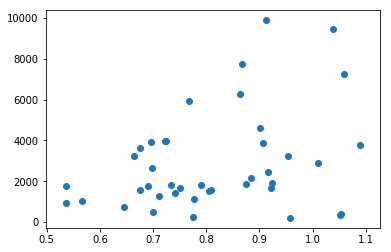

In [560]:
pl.scatter(validation1["n/o"], validation1.count_new_buildings)

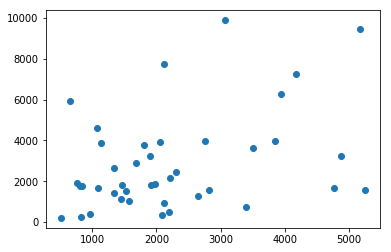

In [561]:
pl.scatter(validation1.count_major_renovation, validation1.count_new_buildings)

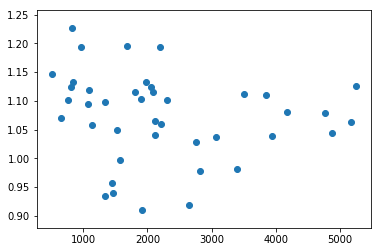

In [562]:
pl.scatter(validation1.count_major_renovation, validation1.increase_3_year)

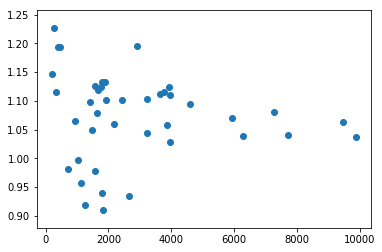

In [563]:
pl.scatter(validation1.count_new_buildings, validation1.increase_3_year)

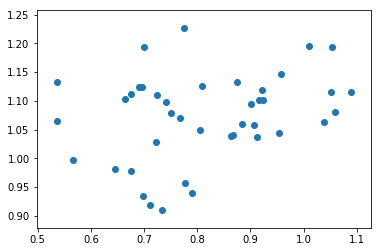

In [564]:
pl.scatter(validation1["n/o"], validation1.increase_3_year)

# Other stuff without rent

In [565]:
validation2 = pd.merge(ultimate_df_, furman, on = "ZIPCODE")

In [566]:
validation2 = gp.GeoDataFrame(validation2)

In [567]:
validation2.columns

Index(['ZIPCODE_y', 'n/o', 'ZIPCODE', 'POPULATION', 'AREA', 'COUNTY',
       'count_major_renovation', 'geometry', 'count_new_buildings',
       'renovation_index', 'Unnamed: 0', 'zipcode', 'gentrification'],
      dtype='object')

Text(0.5,1,'Furman')

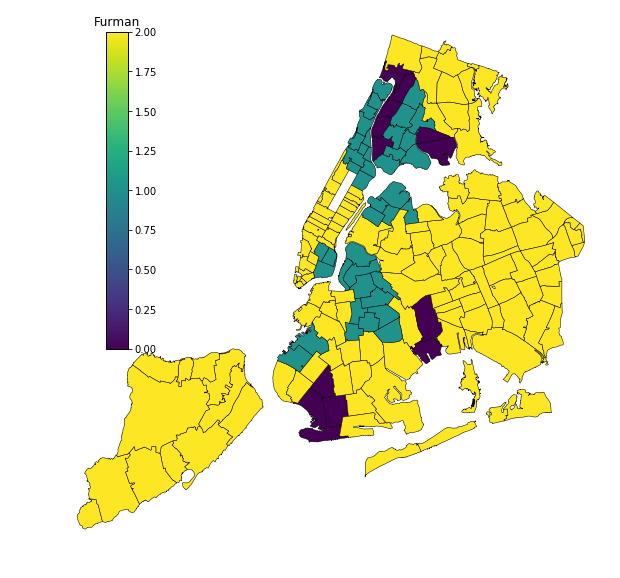

In [568]:
cp.choroplethNYC(validation2, column="gentrification", color="k",cmap="viridis", edgecolor="k", lw=0.5);
pl.title("Furman")

Text(0.5,1,'Index')

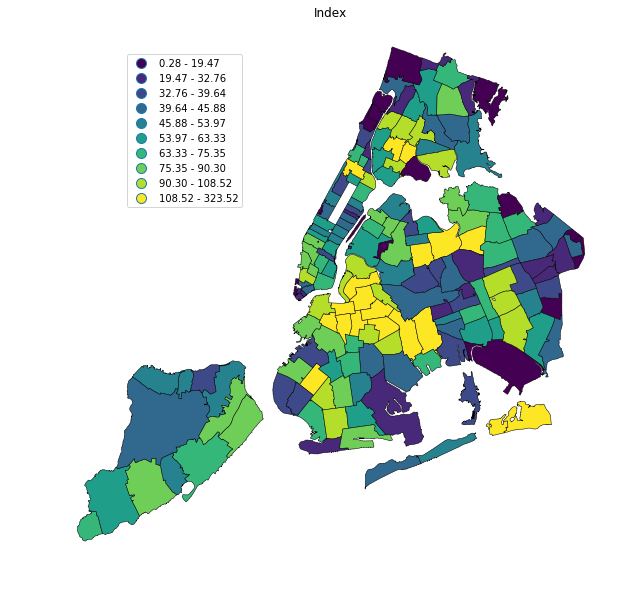

In [569]:
cp.choroplethNYC(validation2, column="renovation_index", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Index")

In [570]:
final_index_data_["average_rent_2017"] = (final_index_data_["2017-01"] + final_index_data_["2017-02"] +final_index_data_["2017-03"] +final_index_data_["2017-04"] +final_index_data_["2017-05"] +final_index_data_["2017-06"] +final_index_data_["2017-07"] +final_index_data_["2017-08"] +final_index_data_["2017-09"] +final_index_data_["2017-10"] +final_index_data_["2017-11"] +final_index_data_["2017-12"])/12
final_index_data_["average_rent_2014"] = (final_index_data_["2014-01"] + final_index_data_["2014-02"] +final_index_data_["2014-03"] +final_index_data_["2014-04"] +final_index_data_["2014-05"] +final_index_data_["2014-06"] +final_index_data_["2014-07"] +final_index_data_["2014-08"] +final_index_data_["2014-09"] +final_index_data_["2014-10"] +final_index_data_["2014-11"] +final_index_data_["2014-12"])/12

final_index_data_["increase_3_year"] = final_index_data_["average_rent_2017"] / final_index_data_["average_rent_2014"]
final_index_data_["renovation_index_with_rent"] = 100 * final_index_data_["n/o"] * final_index_data_["increase_3_year"] * (final_index_data_["count_new_buildings"] * 1.5 + final_index_data_["count_major_renovation"]) / final_index_data_["AREA"]**0.5
final_index_data_["3_year_absolute_rent_increase"] = final_index_data_["average_rent_2017"]-final_index_data_["average_rent_2014"]





Text(0.5,1,'Percentual Increase')

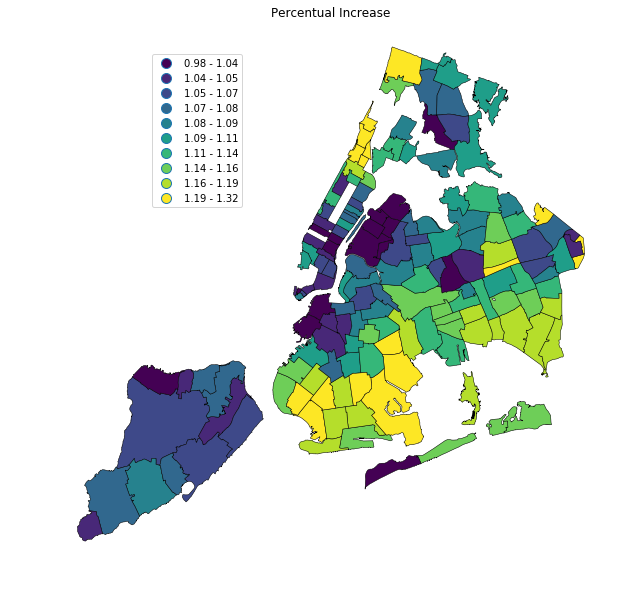

In [571]:
cp.choroplethNYC(final_index_data_, column="increase_3_year", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Percentual Increase")

Text(0.5,1,'Absolute Increase')

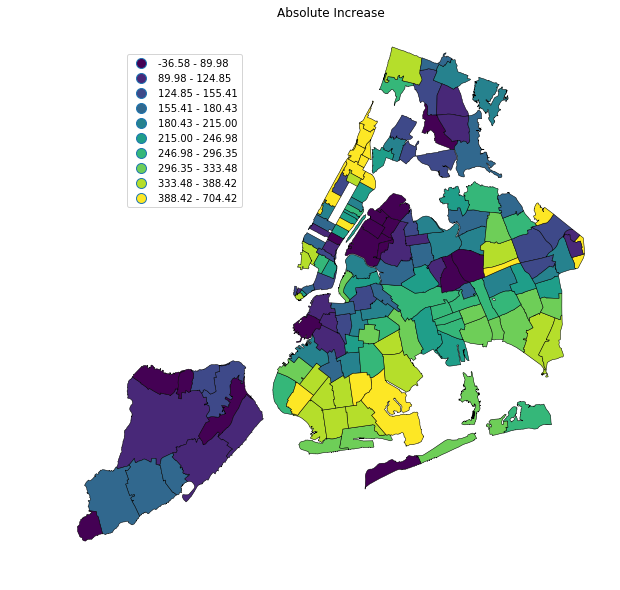

In [572]:
cp.choroplethNYC(final_index_data_, column="3_year_absolute_rent_increase", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Absolute Increase")

Text(0.5,1,'Percentual Increase')

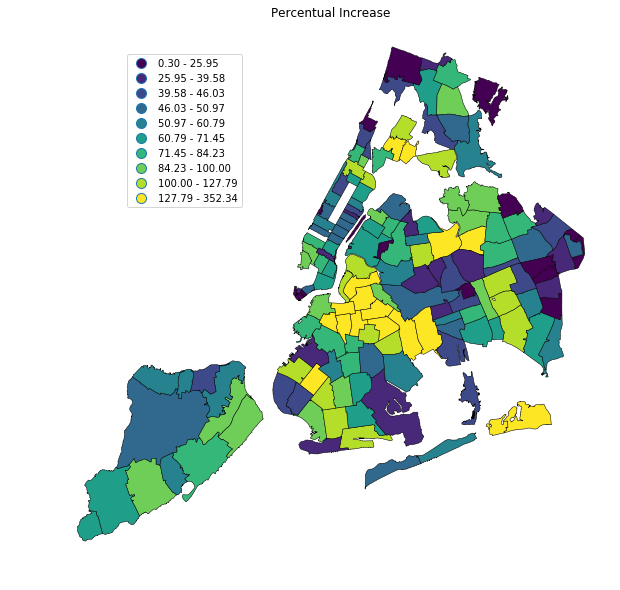

In [573]:
cp.choroplethNYC(final_index_data_, column="renovation_index_with_rent", color="k",cmap="viridis", edgecolor="k", lw=0.5, scheme="quantiles");
pl.title("Percentual Increase")

In [574]:
validation = pd.merge(furman, final_index_data_, on = "ZIPCODE")
validation = gp.GeoDataFrame(validation)
test = validation.groupby("gentrification").mean()

(50, 120)

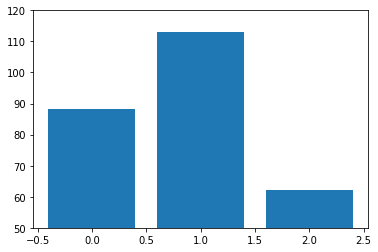

In [580]:
pl.bar(test.index, test.renovation_index_with_rent)
pl.ylim(50,120)

(50, 120)

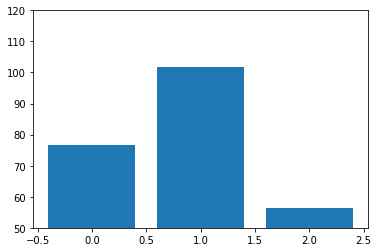

In [581]:
pl.bar(test.index, test.renovation_index)
pl.ylim(50,120)

In [582]:
validation.gentrification.value_counts()

2    121
1     33
0      8
Name: gentrification, dtype: int64

In [578]:
Major_Renovation_.shape

(227, 6)

In [579]:
validation1  = validation[validation["gentrification"]!=2]